## Task 2 - To Explore Supervised Machine Learning
### Luv Michael Surve

### Importing Libraries for data reading and preparation

In [13]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from matplotlib import style 
%matplotlib inline
style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,6)

In [14]:
main_df = pd.read_csv('http://bit.ly/w-data')
main_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Hours(Independent values) determine Scores(Dependent values)

In [15]:
#Independent data
X = main_df['Hours'].values
#Dependent data
Y = main_df['Scores'].values
#Reshaping as Scikit learn cannot interpret rank 1 matrix
X = X.reshape((-1,1))
Y = Y.reshape((-1,1))

## Visualising initial data(Scatter Plot)

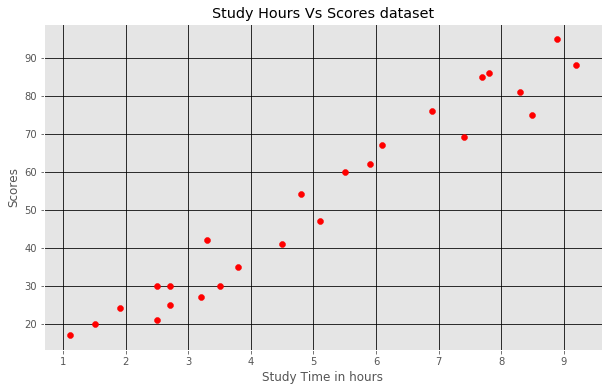

In [16]:
plt.title("Study Hours Vs Scores dataset")
plt.scatter(X,Y,c='r',label='Scatter Plot')
plt.xlabel("Study Time in hours")
plt.ylabel("Scores")
plt.grid(True,c='k')
plt.show()

### Importing Scikit modules for training and testing Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### The dataset is split for testing and training, With 25% of the dataset assigned for testing and 75% for training the model

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0) 

#### Creating the Linear Regression model

In [19]:
#Creating Model
reg = LinearRegression()

#### Training the created model

In [20]:
#Training Model
reg.fit(X_train,Y_train)
print('Training completed')

Training completed


#### The regression line obtained from the trained model has the equation y = mx + c
#### Where y = predicted score, x = no. of hrs studied, m = Slope of the equation, c = Y-intercept

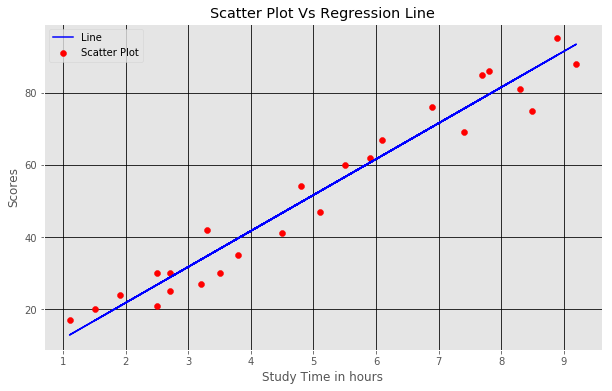

In [21]:
#Plotting the regression line y = mx + c
m = reg.coef_
c = reg.intercept_
x = X
y = m*x + c
plt.title("Scatter Plot Vs Regression Line")
plt.scatter(X,Y,c = 'r',label = 'Scatter Plot')
plt.plot(x,y,c = 'b',label = 'Line')
plt.xlabel("Study Time in hours")
plt.ylabel("Scores")
plt.grid(True,c='k')
plt.legend()
plt.show()

### Testing Model

#### From the previous split testing set the model is asked to predict scores for given no. of hrs studied.
#### The test result is then plotted.

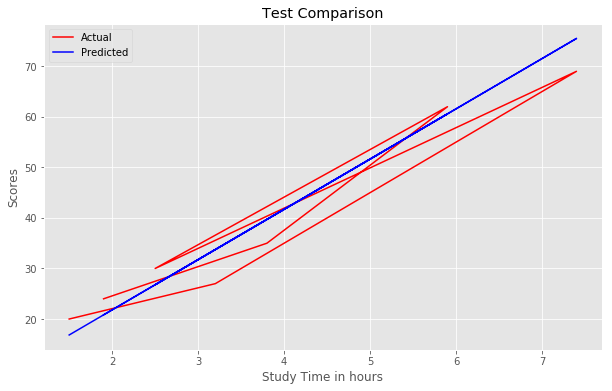

In [22]:
Y_pred = reg.predict(X_test)
data = {'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()}
test_df = pd.DataFrame(data)  
plt.plot(X_test.flatten(),test_df.loc[:,'Actual'].values,label="Actual",c = 'r')
plt.plot(X_test.flatten(),test_df.loc[:,'Predicted'].values,label="Predicted",c = 'b')
plt.xlabel("Study Time in hours")
plt.ylabel("Scores")
plt.title("Test Comparison")
plt.legend()
plt.show()


### What will be the predicted score if a student studies for 9.25 hrs a day?

In [23]:
hrs = 9.25
Answer = reg.predict([[hrs]]).flatten()
print("If a Student studies for",hrs,"hours a day then the student can score:",Answer[0],"Marks")

If a Student studies for 9.25 hours a day then the student can score: 93.89272889341655 Marks


## Evaluating the model

#### Importing metrics module to evaluate the model

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.130879918502486
